In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import dateutil.parser as parser
from datetime import datetime, date, timedelta
import torch
import skorch
import scipy
import torch.nn as nn
import torch
import torch.nn.functional as F
import sys
from skorch.helper import DataFrameTransformer
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import SGDClassifier
from skorch import NeuralNetRegressor, NeuralNetBinaryClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split  
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
merged = pd.read_csv('merged.csv')
lemmatizer = WordNetLemmatizer()

def lemming(tweet):
    a = word_tokenize(tweet)
    answer = list(map(lambda x: lemmatizer.lemmatize(x), a))
    return answer

all_tweets = merged["text"]
all_tweets = all_tweets.to_list()
print(all_tweets[0])
# for tweet in all_tweets:
#     # Remove all the special characters
#     processed_tweet = re.sub(r'\W', ' ', tweet)
 
#     # remove all single characters
#     processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
#     # Remove single characters from the start
#     processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
#     # Substituting multiple spaces with single space
#     processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
#     # Removing prefixed 'b'
#     processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    
#     processed_tweet = re.sub(r'http\S+', '', processed_tweet)
#     #removing common pronouns and prepositions
#     processed_tweet = re.sub(r'of|to|https|keep|128', '', processed_tweet)
 
#     # Converting to Lowercase
#     processed_tweet = processed_tweet.lower()
    
#     tweet = processed_tweet
    
processed_tweets = []
X = all_tweets
for tweet in range(0, len(X)):  
    

    processed_tweet = re.sub(r"http\S+", "", str(X[tweet]))

    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', processed_tweet)
    
#     processed_tweet = re.sub(r'http\S+', '', processed_tweet)
    
    
#     processed_tweet = re.sub(r'co\S+', '', processed_tweet) 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    

    
#     processed_tweet = re.sub(r'of|to|https|keep', '', processed_tweet)
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    
    processed_tweet = lemming(processed_tweet)
    
    processed_tweets.append(processed_tweet)

RT @Nicochan33: Apple Execs Chose to Keep a Hack of 128 Million iPhones Quiet https://t.co/waR9tgHKCA #tech #feedly #apple #iphone #cyberse…


In [11]:
print(all_tweets[0])
print(processed_tweets[0:2])

RT @Nicochan33: Apple Execs Chose to Keep a Hack of 128 Million iPhones Quiet https://t.co/waR9tgHKCA #tech #feedly #apple #iphone #cyberse…
[['rt', 'nicochan33', 'apple', 'exec', 'chose', 'to', 'keep', 'hack', 'of', '128', 'million', 'iphones', 'quiet', 'tech', 'feedly', 'apple', 'iphone', 'cyberse'], ['rt', 'roselovestyle', 'house', 'of', 'the', 'dragon', 'the', 'prequel', 'to', 'game', 'of', 'throne', 'wa', 'announced', 'by', 'casey', 'bloys', 'president', 'of', 'hbo', 'gamesofthrones']]


In [13]:
def identity_tokenizer(text):
    return text

tfidfv = TfidfVectorizer(tokenizer=identity_tokenizer, input="array", lowercase=False, norm="l2", max_features=None, sublinear_tf=True, stop_words="english",token_pattern=r'[^\s]+')
df2 = tfidfv.fit_transform(processed_tweets)
# df2array = df2.toarray()

# https://programmerbackpack.com/tf-idf-explained-and-python-implementation/
dfnew = pd.DataFrame(df2[0].T.todense(), index=tfidfv.get_feature_names(), columns=["TF-IDF"])
dfnew = dfnew.sort_values('TF-IDF', ascending=False)
print (dfnew.head(30))

D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


                          TF-IDF
cyberse                 0.399372
quiet                   0.353797
exec                    0.347454
chose                   0.344993
feedly                  0.307125
nicochan33              0.302614
128                     0.282760
hack                    0.266367
iphones                 0.232281
million                 0.198864
tech                    0.157020
iphone                  0.103200
apple                   0.079288
rt                      0.060715
tomou                   0.000000
tomoto1234567           0.000000
tomotomocacchiocacchio  0.000000
tomoyasuohmi            0.000000
tomoyajuku              0.000000
0                       0.000000
tomotakas               0.000000
tomostech               0.000000
tomorrowspaperstoday    0.000000
tomorrowland            0.000000
tomorrow_x_together     0.000000
tomorrow                0.000000
tomorrowstudios         0.000000
tomphillipseg           0.000000
tomoyo                  0.000000
tompetty  

4.04
-4.57
-0.12666603819921832
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]
[15 15 15 ... 12 12 12]
[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[15745  6630 14905 41883 25827 29318 33841 46210 73033 46221 31477 37501
 14323 44459 15549 22017 18192]
[15745     0  6630 14905 41883 25827 29318 33841 46210 73033 46221 31477
 37501 14323 44459 15549 22017     0 18192]
1
19
20
17
19


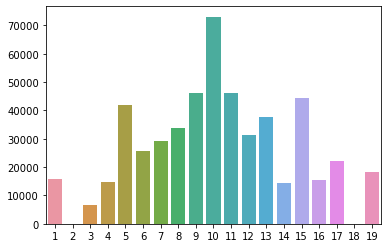

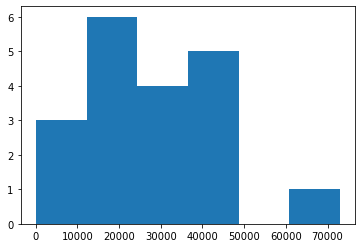

In [14]:
y = merged['Change']
date = merged['Date']
# plt.bar(x=date,height=y)

for x in y:
    if -4.5 <= x <= -4:
        print(hi)
    if 3.5 <= x <= 4:
        print(hi)
#     if -5 <= x <= -4.5:
#         print("between-5and-4.5")       
#     if 4 <= x <= 4.5:
#         print("between4and4.5")     
print(y.max())
print(y.min())
print(y.mean())
bins = np.arange(start=-5, stop=5, step = 0.5)
# bins = np.array([-1,1])
print(bins)
ybin = np.digitize(y, bins, right=True)
print(ybin)
uniq, counts = np.unique(ybin, return_counts=True)
np.set_printoptions(threshold=sys.maxsize)
print(uniq)
uniq = np.insert(uniq,1,2)
uniq = np.insert(uniq,17,18)
print(uniq)
print(counts)
counts = np.insert(counts,1,0)
counts = np.insert(counts,17,0)
print(counts)
np.set_printoptions(threshold = False)
# uniq.insert(1,2)
# uniq.insert(-2,18)
print(ybin.min())
print(ybin.max())
print(len(bins))
print(len(np.unique(ybin)))
print(len(counts))
sns.barplot(x=uniq,y=counts)
plt.show()
plt.hist(counts, bins='auto')
plt.show()

In [15]:
#Selecting the data and splitting into train and test
y = merged['Change']
print(type(y))
# X = df3
# X = df2
# X = df2array
X = processed_tweets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=0)

# train_holdout_data.to_csv('train_holdout_data.csv', index=False)
# x_holdout.to_csv('x_holdout.csv', index=False)
# y_holdout.to_csv('y_holdout.csv', index=False)
# train_data.to_csv('train_data.csv', index=False)
# x_train.to_csv('x_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# # x_test.to_csv('x_test.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# # train_holdout_data = pd.read_csv('train_holdout_data.csv')
# # x_holdout = pd.read_csv('x_holdout.csv')
# # y_holdout = pd.read_csv('y_holdout.csv')
# # x_train = pd.read_csv('x_train.csv')
# y_train = pd.read_csv('y_train.csv')
# # x_test = pd.read_csv('x_test.csv')
# y_test = pd.read_csv('y_test.csv')

<class 'pandas.core.series.Series'>


In [17]:
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False,
               input="array",
               norm="l2",
               max_features=None,
               sublinear_tf=True,
               stop_words="english")),
          ("clf", SGDClassifier(
               loss="log",
               penalty="l2",
               class_weight="balanced",
               tol=0.001))])

pipe.fit(x_train, y_train)

pred_test = pipe.predict(x_test)
pred_train = pipe.predict(x_train)
print("test accuracy", str(np.mean(pred_test == y_test)))
print(metrics.classification_report(y_test, pred_test))

test accuracy 0.2398890038384561
              precision    recall  f1-score   support

           1       0.20      0.33      0.25      3164
           3       0.08      0.37      0.13      1339
           4       0.17      0.30      0.22      3000
           5       0.27      0.15      0.20      8315
           6       0.25      0.32      0.28      5130
           7       0.41      0.42      0.41      5965
           8       0.23      0.14      0.18      6684
           9       0.32      0.24      0.27      9299
          10       0.24      0.34      0.28     14536
          11       0.29      0.17      0.21      9225
          12       0.26      0.17      0.20      6254
          13       0.24      0.13      0.17      7409
          14       0.25      0.29      0.27      2849
          15       0.32      0.15      0.21      9095
          16       0.17      0.31      0.22      3089
          17       0.19      0.24      0.21      4407
          19       0.19      0.28      0.22     

In [6]:
rmse = mean_squared_error(y_test, pred_test, squared = False)
rmse

5.623315320271277

In [22]:
alist = [0.001,0.01,0.05,0.1,0.2,0.5,1,2,3,4.5]
# for a in alist:
#     print("Bin interval:", a)
#     bins = np.arange(start=-4.5, stop=(4.5+a), step = a)
# This process found no highly significant accuracy differences, but overall found 0.2 as optimal at this current stage

# bins = np.arange(start=-4.6, stop=(4.2), step = 0.2)
# y = merged['Change']
# # bins = np.array([-1,1])
# ybin = np.digitize(y, bins)
# X = processed_tweets
# x_train, x_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=0)


#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False,
               input="array",
               norm="l2",
               max_features=None,
               sublinear_tf=True,
               stop_words="english")),
          ("clf", MultinomialNB())])


pipe.fit(x_train, y_train)  
#Predict y value for test dataset
y_predict = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_train)[:,1]
print(classification_report(y_test,y_predict))
print()
# print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)

D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


              precision    recall  f1-score   support

           1       0.84      0.11      0.19      3164
           3       0.79      0.03      0.06      1339
           4       0.85      0.05      0.10      3000
           5       0.54      0.21      0.30      8315
           6       0.61      0.24      0.34      5130
           7       0.69      0.32      0.44      5965
           8       0.67      0.13      0.22      6684
           9       0.56      0.29      0.38      9299
          10       0.18      0.92      0.31     14536
          11       0.46      0.28      0.35      9225
          12       0.63      0.14      0.23      6254
          13       0.61      0.18      0.28      7409
          14       0.76      0.15      0.26      2849
          15       0.46      0.25      0.33      9095
          16       0.81      0.07      0.12      3089
          17       0.76      0.11      0.19      4407
          19       0.77      0.13      0.22      3667

    accuracy              

In [23]:
# MODEL TESTING CELL
print(np.where(bins == 2)[0][0])
y_test1 = []
for x in y_test:
    for b in bins:
        if x == ((np.where(bins == b)[0][0])-1):
            y_test1.append(b-1)
print(y_test1[0:10])

14
[-1.5, 0.0, -0.5, -0.5, -3.5, 0.5, -2.5, -2.5, -0.5, -0.5]


In [24]:
profit = 0
for real, pred in zip(y_test1, y_predict):
    invest = 0
    if 15 >= pred > 11:
        invest = -2
    if pred > 15:
        invest = -1
    if 5 <= pred < 9:
        invest = 1
    if pred < 5:
        invest = 2
    change = (real * invest)
    profit += change
print(profit)
        

5524.0


In [25]:
y_train1 = y_train.astype(np.float32)
y_test1 = y_test.astype(np.float32)
# x_train1 = x_train.scipy.sparse.csr_matrix.astype(dtype = np.float32)
# x_test1 = x_test.scipy.sparse.csr_matrix.astype(dtype = np.float32)

In [29]:
in_dimension = 413704
hid_dimension = 3
out_dimension = 1

class PoleNN(nn.Module):
    def __init__(self):
        super(PoleNN, self).__init__()
        self.fc1 = nn.Linear(in_dimension,hid_dimension)
        self.fc2 = nn.Linear(hid_dimension,out_dimension)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, X):
        hidden = self.fc1(X)
        hidden = self.sigmoid(hidden)
        output = self.fc2(hidden)
        return output

from skorch import NeuralNetRegressor
from sklearn.pipeline import Pipeline

pole_model = PoleNN()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(pole_model.parameters(), lr = 0.1)

net = NeuralNetBinaryClassifier(module=PoleNN, max_epochs=10, lr=0.1)

# pipe = Pipeline([('transform', DataFrameTransformer()),('net', net)])
# pipe = Pipeline([('net', net)])

pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("net", net)])


pipe.fit(x_train, y_train1)  
#Predict y value for test dataset
y_predict = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_train)[:,1]
print(classification_report(y_test1,y_predict))
# print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)

D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat1' in call to _th_addmm

In [20]:
from sklearn.svm import LinearSVR, SVR

data = pd.DataFrame()
data['text'] = processed_tweets
data['bins'] = ybin.tolist()
data

,text,bins
0,rt nicochan33 apple execs chose to keep hack o...,15
1,rt roselovestyle house of the dragon the prequ...,15
2,rt gtorges ich habe jetzt einiges an material ...,15
3,rt itech911 future versions of apple carkey co...,15
4,発売日に予約してようやく届いた apple airtag ケースは純正じゃない 忘れん坊 実...,15
...,...,...
517126,rt mobitrade_ original apple airpods pro new a...,12
517127,ios apple swiftui swiftui 2 0 complex ui movi...,12
517128,sommige appels worden te snel slecht apple,12
517129,apple kia stockmarkets,12


In [21]:
data1 = data.sample(frac=0.01)
X1 = data1['text'].tolist()
ybin2 = np.array(data1['bins'])
x_train, x_test, y_train, y_test = train_test_split(X1, ybin2, test_size=0.2, random_state=0)

In [13]:
x_trainsvm = x_train
y_trainsvm = y_train
x_testsvm = x_test

y_trainsvm = np.array(y_train).ravel()
y_testsvm = np.array(y_test).ravel()
#Create the SVM model

start = time.time()
# regressor = LinearSVR(random_state = 0)
regressor = SVR()
#Fit the model for the data
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("regressor", regressor)])
pipe.fit(x_trainsvm, y_trainsvm)

#Make the prediction
y_predsvm = pipe.predict(x_testsvm)






# accuracies = cross_val_score(estimator = regressor, X = x_trainsvm, y = y_trainsvm, cv = 10)
end = time.time()
# print("Fraction: ", x)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mse = mean_squared_error(y_test,y_predsvm)
print("Mean Squared Error: {}".format(mse))
r2 = r2_score(y_test,y_predsvm)
print("R-squared: {}".format(r2))
print("")
print("Elapsed Time: ", (end-start),"\n")

Mean Squared Error: 16.31763131713621
R-squared: 0.07789844221130726

Elapsed Time:  457.9971306324005 



D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\Documents\anaconda3\envs\DataSciEnv\lib\site-packages\sklearn\utils\validation.p

In [22]:
#This is the GridsearchCV parameters
gamma = []
y = 0.0001
for x in range(24):
    gamma.append(y)
    y = y*1.5
print(gamma)
gamma[-1] = 1
gamma = [round(g, 5) for g in gamma]
print(gamma)
kernel = ['linear','rbf', 'poly', 'sigmoid']
c = [0.1, 0.3, 1, 3, 10, 30, 100, 300]


x_trainsvm = x_train
y_trainsvm = y_train
x_testsvm = x_test

y_trainsvm = np.array(y_train).ravel()
y_testsvm = np.array(y_test).ravel()

#This section details the GridsearchCV process which took approximately 20 hours.
tuned_parameters = [{'kernel': kernel, 'gamma': gamma, 'C': c}]
tfidf_vector_com = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")
x_trainsvm = tfidf_vector_com.fit_transform(x_trainsvm)
x_testsvm = tfidf_vector_com.fit_transform(x_testsvm)


print("# Tuning hyper-parameters")
print()


#Create the SVM model

start = time.time()
# regressor = LinearSVR(random_state = 0)
regressor = SVR()
#Fit the model for the data
# pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("clf", GridSearchCV(regressor, tuned_parameters))])
# pipe.fit(x_trainsvm, y_trainsvm)

clf = GridSearchCV(regressor, tuned_parameters)
clf.fit(x_trainsvm, y_trainsvm)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))
print()

[0.0001, 0.00015000000000000001, 0.00022500000000000002, 0.0003375, 0.00050625, 0.000759375, 0.0011390624999999999, 0.0017085937499999998, 0.0025628906249999996, 0.0038443359374999994, 0.00576650390625, 0.008649755859375, 0.0129746337890625, 0.01946195068359375, 0.029192926025390625, 0.043789389038085935, 0.0656840835571289, 0.09852612533569335, 0.14778918800354002, 0.22168378200531003, 0.33252567300796504, 0.49878850951194753, 0.7481827642679213, 1.122274146401882]
[0.0001, 0.00015, 0.00023, 0.00034, 0.00051, 0.00076, 0.00114, 0.00171, 0.00256, 0.00384, 0.00577, 0.00865, 0.01297, 0.01946, 0.02919, 0.04379, 0.06568, 0.09853, 0.14779, 0.22168, 0.33253, 0.49879, 0.74818, 1]
# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Grid scores on development set:

0.006 (+/-0.009) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
-0.002 (+/-0.004) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.002 (+/-0.004) for {'C': 0.1, 'gam

ValueError: could not convert string to float: 'browse amp make beautiful apple watch faces applewatch apple applewatchseries4 give your watch facelift '

AttributeError: 'Pipeline' object has no attribute 'best_params_'